<h1>Storytelling Data Visualization on Exchange Rates</h1>

In this analysis we will breakdown the trend of the Euro-Dollar and other Euro pairs over time, the dataset to be analysed contains data on the daily closing prices of 40 Euro currency pairs from 1999 to January 2023. 
We will discover trends in the market over periods of time, different economic climates, recessions, economic expansion, pandemics e.t.c The data will be cleaned, transformed, new tables will be created, there wil be step by step commentary to explain what each block of code is doing.

Finally we will create visualizations to show these trends and further deductions will be given on these visualiztions to give further insights on the charts and the trends.

In [1]:
#Importing applicable libraries
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
#Loading and viewing the data
data = pd.read_csv("C:\\Users\Joel2\OneDrive\Desktop\Datasets\euro-daily-hist_1999_2022.csv")
data.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,27/01/2023,1.5289,1.9558,5.5104,1.4479,1.0017,7.369,NaN,23.826,7.4378,...,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.702,20.4365,1.0865,18.7185
1,26/01/2023,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.687,20.4961,1.0895,18.6127
2,25/01/2023,1.536,1.9558,5.569,1.4544,1.002,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.718,20.4658,1.0878,18.6745
3,24/01/2023,1.547,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.609,20.4234,1.0858,18.7687
4,23/01/2023,1.5529,1.9558,5.6372,1.4523,1.0013,7.373,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.63,20.4478,1.0871,18.6597


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

In [4]:
#Renaming the US dollar column
data.rename(columns={'[US dollar ]':'US_dollar','Period\\Unit:':'Time'},inplace=True)

data['Time'] = pd.to_datetime(data['Time'])

In [5]:
data.sort_values("Time",inplace=True)
data.reset_index(drop=True,inplace=True)

In [6]:
data.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-02,1.7882,NaN,NaN,1.7123,1.6089,NaN,0.58109,37.142,7.4363,...,1.3407,26.2429,8.86,1.9169,189.4727,42.883,41.6939,0.3796,1.1338,6.8425
1,1999-01-03,1.7766,NaN,NaN,1.6579,1.593,NaN,0.57991,37.57,7.4347,...,1.4079,25.3933,9.0005,1.8943,190.3652,43.843,40.9578,0.3902,1.0986,6.7716
2,1999-01-04,1.6928,NaN,NaN,1.6205,1.5957,NaN,0.58036,38.482,7.4316,...,1.5953,28.1222,8.889,1.8671,190.5994,44.991,40.6688,0.4031,1.0772,6.6501
3,1999-01-06,1.6187,NaN,NaN,1.5405,1.5928,NaN,0.57803,37.563,7.4313,...,1.6301,25.7459,8.9675,1.798,194.3397,45.178,38.7102,0.4253,1.0434,6.4821
4,1999-01-07,1.5336,NaN,NaN,1.5035,1.6043,NaN,0.5778,36.171,7.4356,...,1.6238,24.902,8.7215,1.7429,196.4807,45.109,37.766,0.4338,1.0264,6.162


In [7]:
#Creating a data frame from the US_dollar column
euro_to_dollar = data[['Time','US_dollar']]
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-02,1.1338
1,1999-01-03,1.0986
2,1999-01-04,1.0772
3,1999-01-06,1.0434
4,1999-01-07,1.0264


In [8]:
#Dropping null values
euro_to_dollar.dropna(axis='rows',how='any')

,Time,US_dollar
0,1999-01-02,1.1338
1,1999-01-03,1.0986
2,1999-01-04,1.0772
3,1999-01-06,1.0434
4,1999-01-07,1.0264
...,...,...
6224,2023-06-01,1.05
6225,2023-09-01,1.0696
6226,2023-10-01,1.0723
6227,2023-11-01,1.0747


In [9]:
#New euro_to_dollar data frame without the empty inputs
euro_to_dollar = euro_to_dollar[~(euro_to_dollar['US_dollar']=='-')]

In [10]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-02,1.1338
1,1999-01-03,1.0986
2,1999-01-04,1.0772
3,1999-01-06,1.0434
4,1999-01-07,1.0264


In [11]:
#Changing column type to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float64',copy=False)

<h2>Euro-Dollar Trend Analysis During Economic Crisis<h2>

Discover the trend of the euro-dollar during periods of economic crisis in comparison with a stable economy, highlighting the relevant time-frame in the visualization.
A rise in the price of the euro-dollar will imply a fall in the value of the dollar and vice versa, then we will also look out for the trend after the crisis.

<h3>The Great Derpression<h3>

The subprime mortgage crisis led to the collapse of the United States housing bubble.Falling housing-related assets contributed to a global financial crisis, even as oil and food prices soared. The crisis led to the failure or collapse of many of the United States' largest financial institutions: Bear Stearns, Fannie Mae, Freddie Mac, Lehman Brothers, and AIG, as well as a crisis in the automobile industry.

We will now go ahead to see it's effects on the foreign exchange market, using the euro-dollar pair as a case study.

In [12]:
#Creating a new table specific to the anticipated plot
crisis_time_frame = euro_to_dollar['Time'].between('2005-01-01','2010-12-31')
e_crisis = euro_to_dollar.loc[crisis_time_frame]

In [13]:
#Adding a column which ascertains the 90 days rolling mean, making plots more readable.
usd_rolling_90_days = e_crisis['US_dollar'].rolling(90).mean()
e_crisis['roll_90'] = usd_rolling_90_days 

In [14]:
e_crisis.head()

,Time,US_dollar,roll_90
1565,2005-01-02,1.3027,NaN
1566,2005-01-03,1.3216,NaN
1567,2005-01-04,1.2959,NaN
1568,2005-01-06,1.2228,NaN
1569,2005-01-07,1.2087,NaN


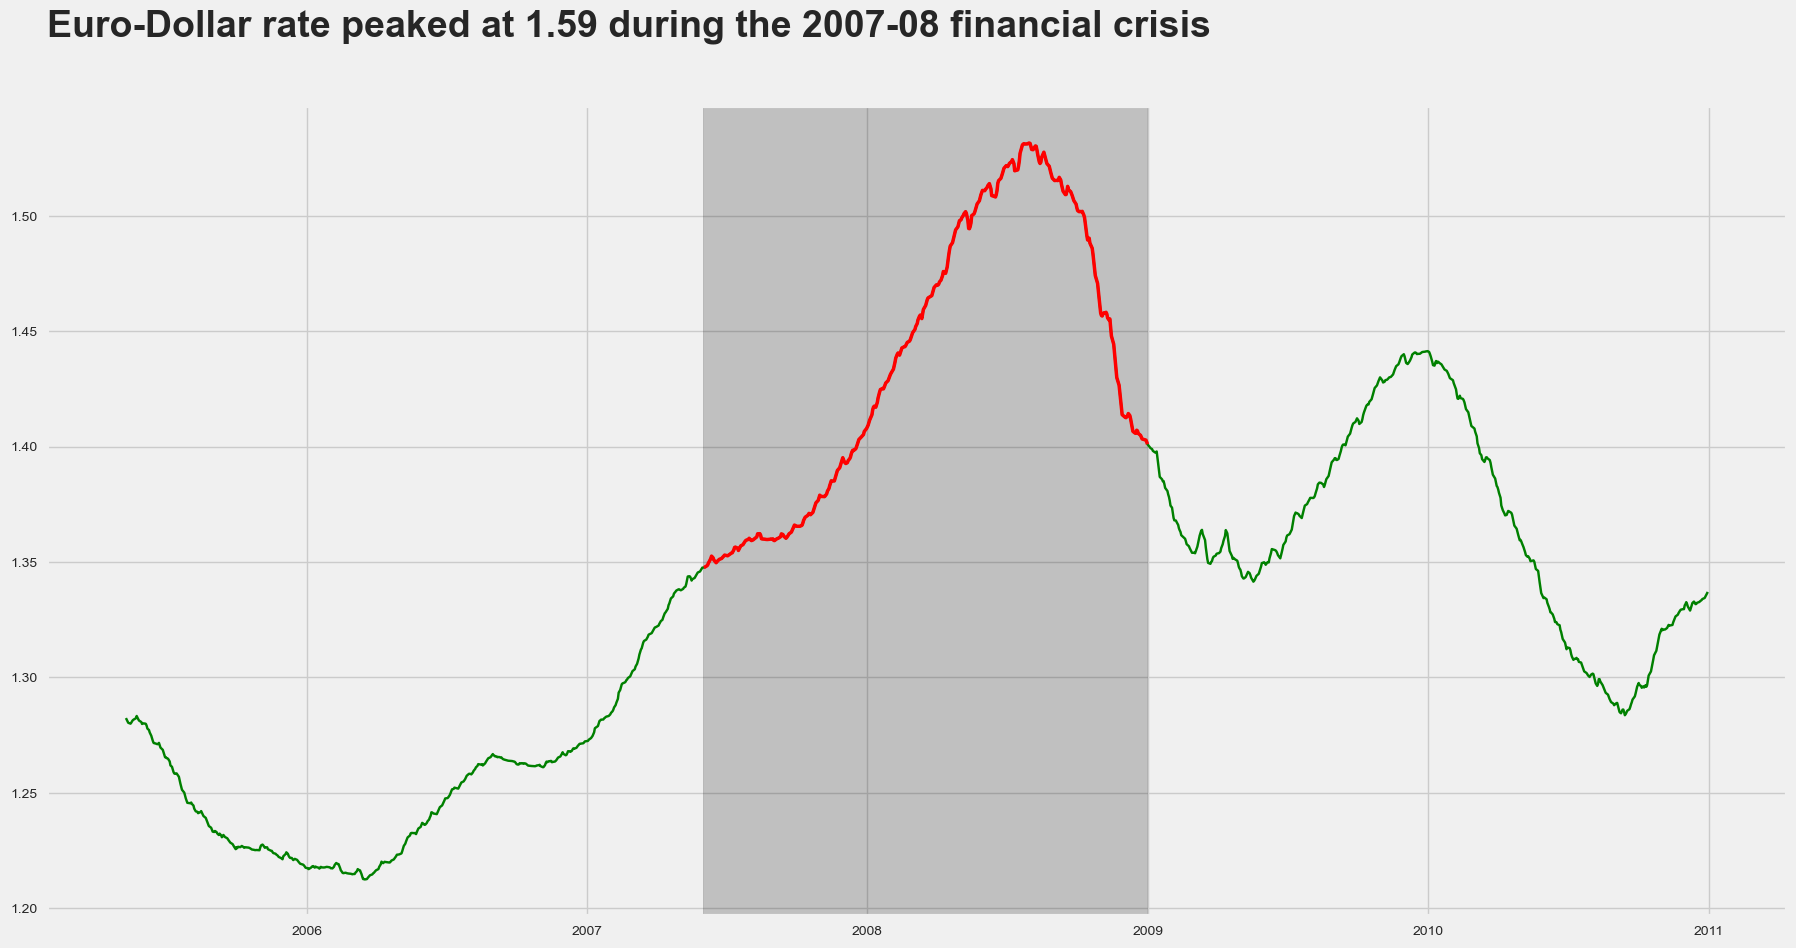

In [28]:
#Plotting the graph
plt.style.use('fivethirtyeight')
plt.plot(e_crisis.Time,e_crisis['roll_90'],c='green',linewidth=1.75)

plt.title("Euro-Dollar rate peaked at 1.59 during the 2007-08 financial crisis",fontsize=27,fontweight="bold",pad=50,loc='left')

plt.rcParams['figure.figsize'] = [20, 10]
plt.axvspan('2007-06-01', '2008-12-31', color="black", alpha=0.2)

yr07_yr08 = e_crisis.loc[e_crisis['Time'].between('2007-06-01','2008-12-31')]
plt.plot(yr07_yr08['Time'],yr07_yr08['roll_90'],c='red',linewidth=2.5)

The Euro-Dollar as seen in the above plot which has been highlighted, rises during this economic crisis and peaks at 1.59,
just about a year into the crisis.

Observations:
(i)It makes a 15.7% jump in a space of 13 months into the crisis.
(ii)It returned to around 1.33 two years after the end of the crisis which is below it's price at the start of the crisis 1.35

ㅤ

<h3>COVID-19 Recession<h3>

Discover the overall trend of the euro-dollar during the period of the Corons Virus pandemic that took the world by storm.
We look to see it's effects whether positive or negative on the euro-dollar market.
We will go on to compare the trend of the euro-dollar from 2016-2019 to trend during the pandemic(2020).


In [16]:
#Creating a new table specific to the anticipated plot,i.e prices from the time period of 2016-19
precovid_time_frame = euro_to_dollar['Time'].between('2016-01-01','2019-12-31')
pre_covid = euro_to_dollar.loc[precovid_time_frame]

#Creating a rolling mean column in the new table, to make the plots a bit less messy.
rolling_90_days2 = pre_covid['US_dollar'].rolling(90).mean()
pre_covid['roll_90'] = rolling_90_days2

In [17]:
pre_covid.head()

,Time,US_dollar,roll_90
4415,2016-01-02,1.0884,NaN
4416,2016-01-03,1.0872,NaN
4417,2016-01-04,1.1432,NaN
4418,2016-01-06,1.1174,NaN
4419,2016-01-07,1.1135,NaN


In [18]:
#Creating a new table specific to the anticipated plot,i.e prices from the time period of 2016-19
covid_time_frame = euro_to_dollar['Time'].between('2020-01-01','2020-12-31')
covid = euro_to_dollar.loc[covid_time_frame]

#Creating a rolling mean column in the new table, to make the plots a bit less messy.
rolling_90_days3 = covid['US_dollar'].rolling(90).mean()
covid['roll_90'] = rolling_90_days3 

In [19]:
covid.head()

,Time,US_dollar,roll_90
5437,2020-01-04,1.0936,NaN
5438,2020-01-06,1.1116,NaN
5439,2020-01-07,1.1200,NaN
5440,2020-01-09,1.1987,NaN
5441,2020-01-10,1.1752,NaN


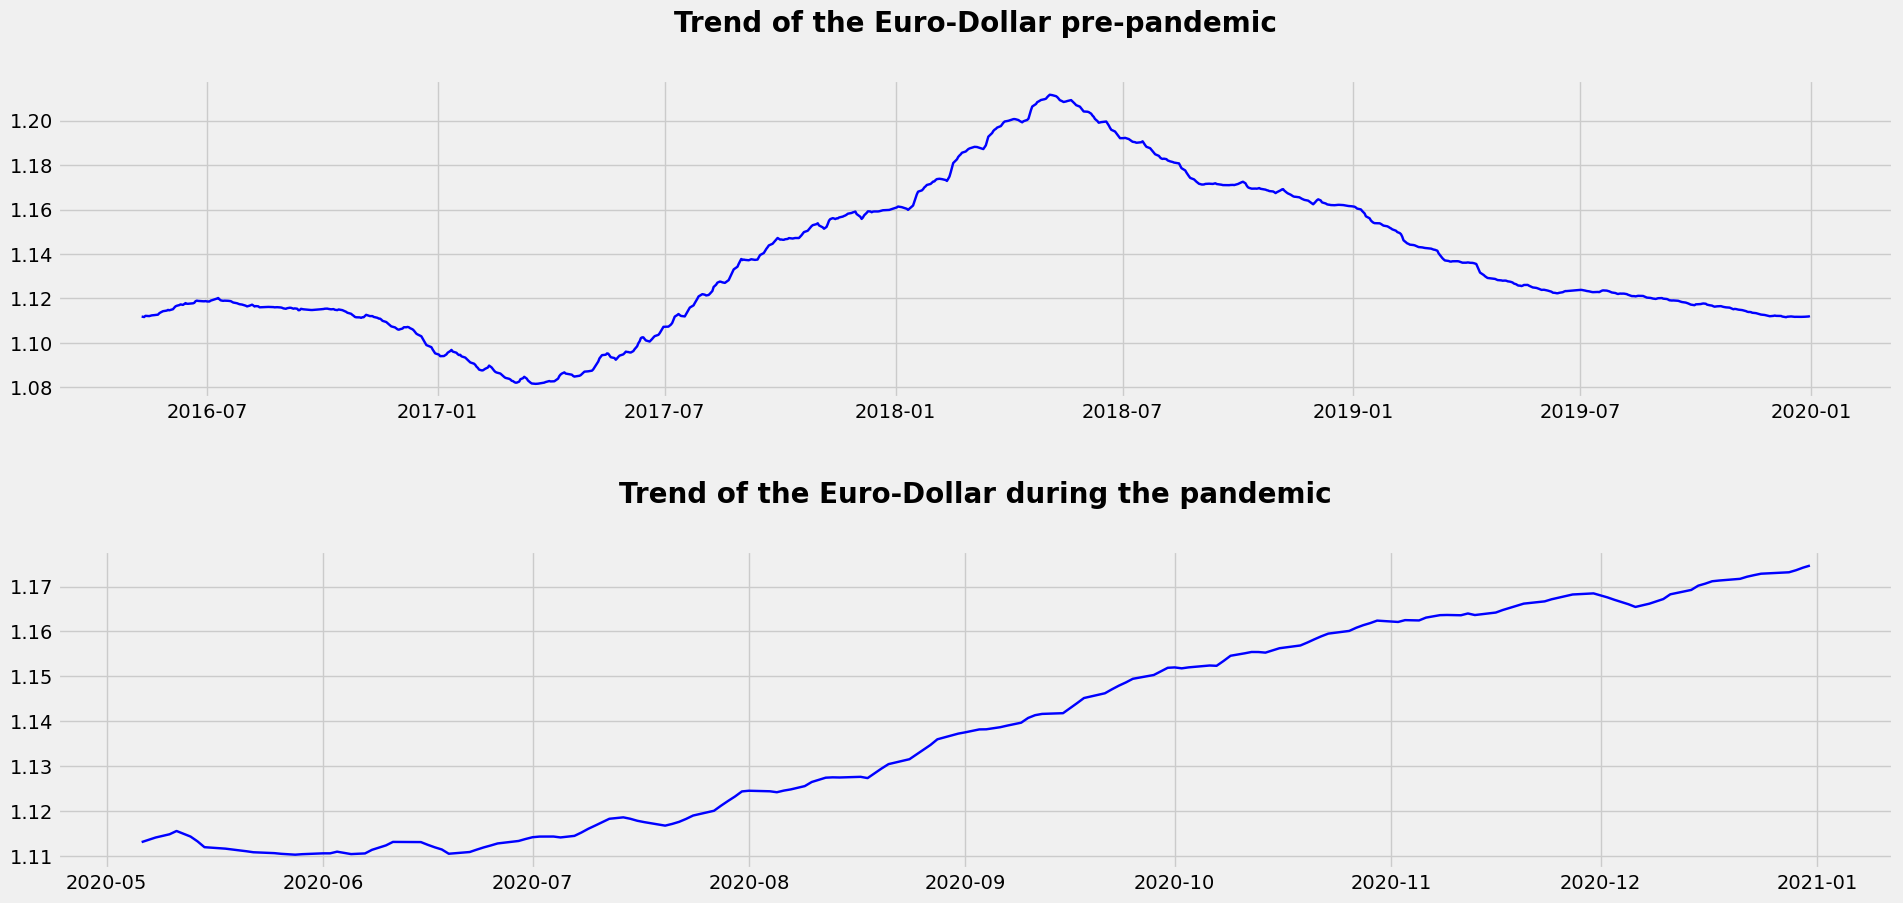

In [20]:
#Creating a plot showing the pre-pandemic and pandemic trend
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)

#Plotting the pre-pandemic graph
ax1.plot(pre_covid.Time,pre_covid['roll_90'],c='b',linewidth=1.75)
ax1.set_title('Trend of the Euro-Dollar pre-pandemic',fontsize=20,fontweight="bold",pad=35,loc='center')

#Plotting the pandemic graph
ax2.plot(covid.Time,covid['roll_90'],c='b',linewidth=1.75)
ax2.set_title('Trend of the Euro-Dollar during the pandemic',fontsize=20,fontweight="bold",pad=35,loc='center')

fig.tight_layout(pad=3)

This visualization presents us with two plots, the first describes the trend of the euro-dollar from 2016-19(pre-pandemic), and the one beneath focuses on the year 2020(pandemic) 

We can derive that;

-There was a steady climb of the rate of the euro dollar throughout the year 2020, ending the year 9% higher than it's price at the start of march.

-Overall the price countinued with a similar trend as it had been for three year, during the period of 2016-19 the average rate of the euro-dollar was 1.13, while it was 1.14 on average throughout 2020 which is just 0.7% higher than that of the pevious three years.

ㅤ

<h2>Trend Analysis On Multiple Currencies<h2>

We will take a look at some of EUR currency pairs and we will look at how they have trended over time, the effects of economic crisis as well as economic expansion. 


<h3>The Real Estate Bubble<h3>

The rise in home prices that began in the mid-1990s developed into a real estate bubble. Building of homes boomed, while low interest rates allowed homeowners to easily withdraw equity, leading to an increase in consumer spending and job growth.
We will now see it's effect on the top 4 currencies.

In [21]:
#Creating new Euro pair tables like the EURO-USD one
euro_to_cad = data[['Time','[Canadian dollar ]']]
euro_to_cad.rename(columns={'[Canadian dollar ]':'CAD_dollar'},inplace=True)

euro_to_aud = data[['Time','[Australian dollar ]']]
euro_to_aud.rename(columns={'[Australian dollar ]':'AUD_dollar'},inplace=True)

euro_to_swf = data[['Time','[Swiss franc ]']]
euro_to_swf.rename(columns={'[Swiss franc ]':'SWF_franc'},inplace=True)


In [22]:
#Updating euro pairs tables without the empty inputs/wrong data type and changing the column data type
euro_to_cad = euro_to_cad[~(euro_to_cad['CAD_dollar']=='-')]
euro_to_cad['CAD_dollar'] = euro_to_cad['CAD_dollar'].astype('float64',copy=False)

euro_to_aud = euro_to_aud[~(euro_to_aud['AUD_dollar']=='-')]
euro_to_aud['AUD_dollar'] = euro_to_aud['AUD_dollar'].astype('float64',copy=False)

euro_to_swf = euro_to_swf[~(euro_to_swf['SWF_franc']=='-')]
euro_to_swf['Swiss franc'] = euro_to_swf['SWF_franc'].astype('float64',copy=False)


In [23]:
""""Creating a new table for each EURO pair specific to the anticipated plot,i.e prices from the time period 
of 2002-07 and a 90 days rolling mean column in the new table"""


usd_time_frame1 = euro_to_dollar['Time'].between('2002-01-01','2007-05-30')
usd_roll_table1 = euro_to_dollar.loc[usd_time_frame1]

usd_rolling_90_days1 = usd_roll_table1['US_dollar'].rolling(90).mean()
usd_roll_table1['roll_90'] = usd_rolling_90_days1 



cad_time_frame1 = euro_to_cad['Time'].between('2002-01-01','2007-05-30')
cad_roll_table1 = euro_to_cad.loc[cad_time_frame1]

cad_rolling_90_days1 = cad_roll_table1['CAD_dollar'].rolling(90).mean()
cad_roll_table1['roll_90'] = cad_rolling_90_days1 



aud_time_frame1 = euro_to_aud['Time'].between('2002-01-01','2007-05-30')
aud_roll_table1 = euro_to_aud.loc[aud_time_frame1]

aud_rolling_90_days1 = aud_roll_table1['AUD_dollar'].rolling(90).mean()
aud_roll_table1['roll_90'] = aud_rolling_90_days1 



swf_time_frame1 = euro_to_swf['Time'].between('2002-01-01','2007-05-30')
swf_roll_table1 = euro_to_swf.loc[swf_time_frame1]

swf_rolling_90_days1 = swf_roll_table1['SWF_franc'].rolling(90).mean()
swf_roll_table1['roll_90'] = swf_rolling_90_days1 

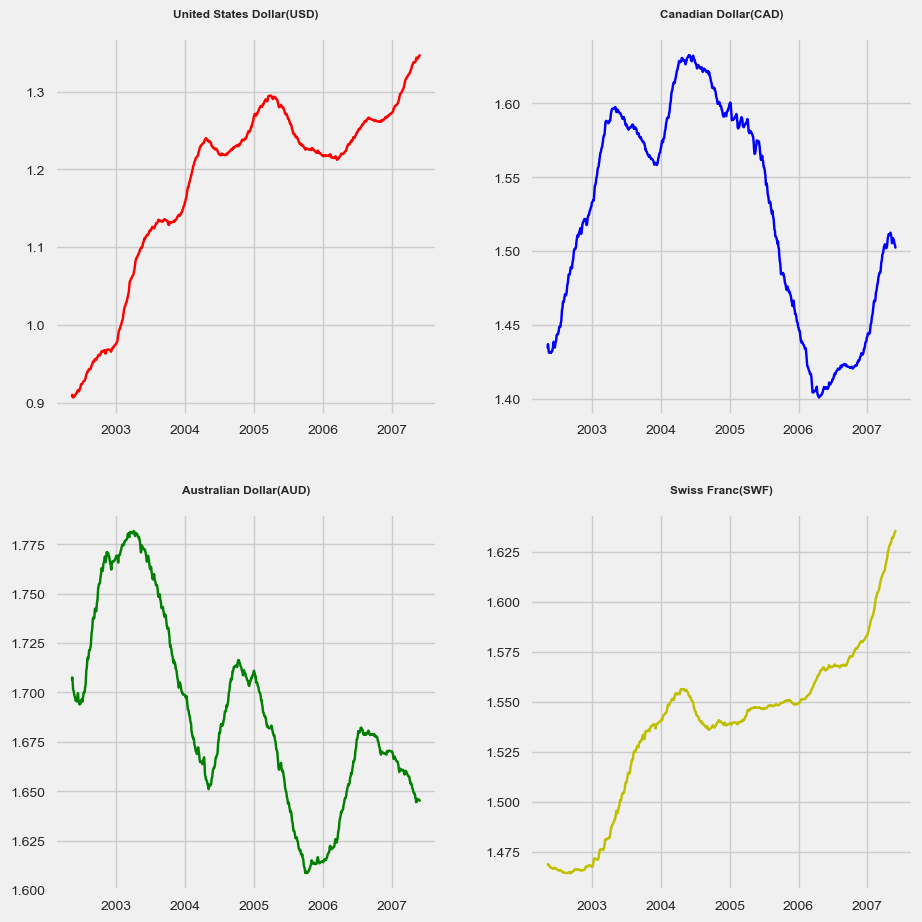

In [29]:
#Creating four different plots in one figure to visualize the trend of each of the currencies. 
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

plt.style.use('seaborn')

ax1.plot(usd_roll_table1.Time,usd_roll_table1['roll_90'],c='r',linewidth=1.75)
ax1.set_title('United States Dollar(USD)',fontsize=8.5,fontweight="bold",pad=15,loc='center')

ax2.plot(cad_roll_table1.Time,cad_roll_table1['roll_90'],c='b',linewidth=1.75)
ax2.set_title('Canadian Dollar(CAD)',fontsize=8.5,fontweight="bold",pad=15,loc='center')


ax3.plot(aud_roll_table1.Time,aud_roll_table1['roll_90'],c='g',linewidth=1.75)
ax3.set_title('Australian Dollar(AUD)',fontsize=8.5,fontweight="bold",pad=15,loc='center')

ax4.plot(swf_roll_table1.Time,swf_roll_table1['roll_90'],c='y',linewidth=1.75)
ax4.set_title('Swiss Franc(SWF)',fontsize=8.5,fontweight="bold",pad=15,loc='center')


fig2.tight_layout(pad=2.5)

From the visualization we see that 3 of the four euro pairs ended with a positive return for the year with EUR/AUD pair experiencing a drop over the period of the real estate bubble. the EUR/USD and EUF/SWF however soared in price with the USD pair rising by over 40% while the SWF pair rose by more than 11% within those years of the real estate bubble.

ㅤ

<h3>The Dot Com Bubble Burst<h3>

The economic success of the 1990's preceded the collapse of the speculative dot-com bubble, a fall in business outlays and investments, brought an end to a decade long growth. Although this recession was short-lived and soon after followed economic expansion and growth for the next five years, we will see how it affected the foreign exchange of the Euro.

We will take a look at how the euro rate fared with the four currencies in the previous analysis.

In [25]:
""""Creating a new table for each EURO pair specific to the anticipated plot,i.e prices from the time period 
of 2001 and a 30 days rolling mean column in the new table"""

usd_time_frame2 = euro_to_dollar['Time'].between('2001-03-01','2001-12-31')
usd_roll_table2 = euro_to_dollar.loc[usd_time_frame2]

usd_rolling_30_days2 = usd_roll_table2['US_dollar'].rolling(30).mean()
usd_roll_table2['roll_30'] = usd_rolling_30_days2



cad_time_frame2 = euro_to_cad['Time'].between('2001-03-01','2001-12-31')
cad_roll_table2 = euro_to_cad.loc[cad_time_frame2]

cad_rolling_30_days2 = cad_roll_table2['CAD_dollar'].rolling(30).mean()
cad_roll_table2['roll_30'] = cad_rolling_30_days2



aud_time_frame2 = euro_to_aud['Time'].between('2001-03-01','2001-12-31')
aud_roll_table2 = euro_to_aud.loc[aud_time_frame2]

aud_rolling_30_days2 = aud_roll_table2['AUD_dollar'].rolling(30).mean()
aud_roll_table2['roll_30'] = aud_rolling_30_days2 



swf_time_frame2 = euro_to_swf['Time'].between('2001-03-01','2001-12-31')
swf_roll_table2 = euro_to_swf.loc[swf_time_frame2]

swf_rolling_30_days2 = swf_roll_table2['SWF_franc'].rolling(30).mean()
swf_roll_table2['roll_30'] = swf_rolling_30_days2 

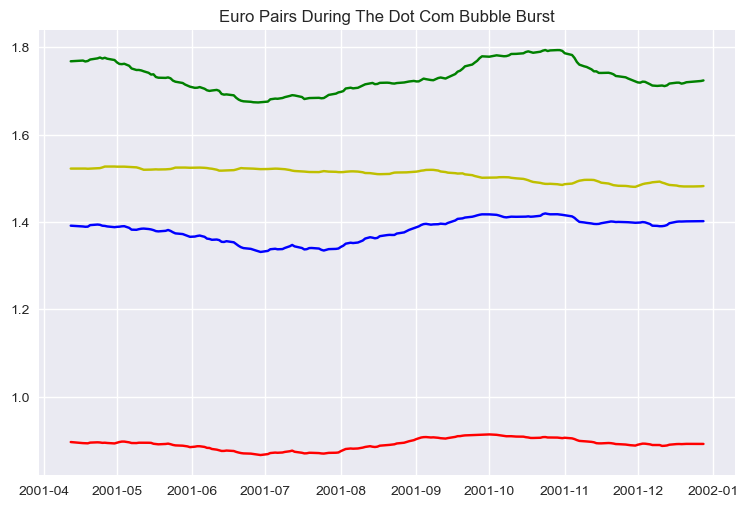

In [26]:
#Creating a plot to visualize the trends of each EURO pairs in the same graph.

plt.style.use('seaborn')

plt.title("Euro Pairs During The Dot Com Bubble Burst")

plt.plot(usd_roll_table2.Time,usd_roll_table2['roll_30'],c='r',linewidth=1.75)

plt.plot(cad_roll_table2.Time,cad_roll_table2['roll_30'],c='b',linewidth=1.75)

plt.plot(aud_roll_table2.Time,aud_roll_table2['roll_30'],c='g',linewidth=1.75)

plt.plot(swf_roll_table2.Time,swf_roll_table2['roll_30'],c='y',linewidth=1.75)


From this visualiztion we can deduce that there wasn't a great deal of impact of the bubble burst on the foreign exchange market, with no major or massive movement within the time period of the bubble burst.

<h3>Conclusion<h3>

In this project we have analysed different Euro pairs and see how they have performed in different climates over the last 20 years we have created visualizations that tell a story and give us more insight.

We've seen the negative impact of the 2008 crash on the dollar and how it strengthened the euro same with 2020 during the pandemic, although the rise was not as significant.

During the real estate bubble there was a real soar in some of the prices of the euro pair show it's strength over other currencies, while the dot com bubble burst a short lived period of recession, had minimal impact on the stability of currencies over that period.

-analysis by Charles Joel